In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import config
import json
from typing import List
from statsmodels.formula.api import ols

In [7]:
def form_dataframe_from_results(metrics: List[str], STATE_FIPS: str):
    """
    Reads in the data in 22_intermediate_files_new_run and forms a dataframe
    """
    results = {metric: [] for metric in metrics}
    results["spatial_diversity"] = []
    print(results)

    for i in range(100, 10100, 100):
        tentative_file = f"22_intermediate_files_new_run/{STATE_FIPS}/data{i}.json"
        with open(tentative_file, "r") as newfile:
            newjson = json.load(newfile)
            for index, newstep in enumerate(newjson):
                for metric in metrics:
                    results[metric].append(np.mean(list(newstep[metric].values())))
                results["spatial_diversity"].append(newstep["spatial_diversity"][0])

    df = pd.DataFrame.from_dict(results, orient="index").transpose()
    return df

In [8]:
metrics = [
        "human_compactness_ed",
        "human_compactness_dd",
        "polsby_compactness",
        "convex_hull_compactness",
        "reock_compactness",
]

In [97]:
df = form_dataframe_from_results(metrics, "49")
df["dd_ed"] = df["human_compactness_dd"] - df["human_compactness_ed"]

{'human_compactness_ed': [], 'human_compactness_dd': [], 'polsby_compactness': [], 'convex_hull_compactness': [], 'reock_compactness': [], 'spatial_diversity': []}


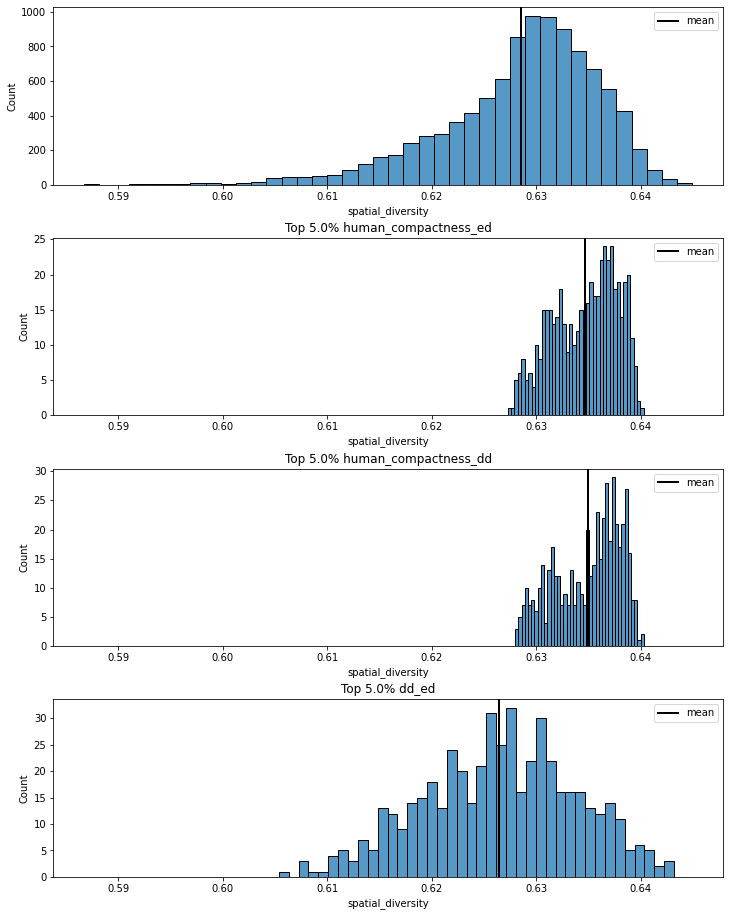

In [98]:
pct = .05
plotting_metrics = ["human_compactness_ed", "human_compactness_dd", "dd_ed"]


fig, ax = plt.subplots(1+len(plotting_metrics),1, figsize=(12,4*(1+len(plotting_metrics))))
fig.subplots_adjust(hspace=0.3)

def return_top_metric(pct, metric):
    return df.sort_values(metric, ascending=False)[:int(len(df)*pct)]

bins = 40

sns.histplot(df["spatial_diversity"],
             bins=bins,
             ax=ax[0])
ax[0].axvline(np.mean(df["spatial_diversity"]), color="black", lw=2, label="mean")
ax[0].legend()
lims = ax[0].get_xlim()

for i, metric in enumerate(plotting_metrics):
    data = return_top_metric(pct, metric)["spatial_diversity"]
    mean = np.mean(data)
    sns.histplot(data,
                 bins=bins,
                 ax=ax[i+1])
    ax[i+1].set_title(f"Top {100*pct}% {metric}")
    ax[i+1].axvline(mean, color="black", lw=2, label="mean")
    ax[i+1].legend()
    

# sns.histplot(return_top_metric(pct, "human_compactness_ed")["spatial_diversity"],
#              bins=bins,
#              ax=ax[1])

# sns.histplot(return_top_metric(pct, "human_compactness_dd")["spatial_diversity"],
#              bins=bins,
#              ax=ax[2])

# sns.histplot(return_top_metric(pct, "reock_compactness")["spatial_diversity"],
#              bins=bins,
#              ax=ax[3])

for i in range(1, len(plotting_metrics)+1):
    ax[i].set_xlim(lims)